# Analyse des émissions de co2 en fonction de différents paramètres de véhicules
## PARTIE 1 : Exploration et nettoyage des données

## Sommaire

1. [Introduction](#1.Introduction)
2. [Exploration des données](#2.Exploration-des-donnees)
   - [Importation des packages et bibliothèques](#importation-des-packages-et-bibliotheques)
   - [Importation des données](#importation-des-donnees)
   - [Premières informations sur le dataframe](#premieres-infos)
3. [Nettoyage des données](#3.Nettoyage-des-donnees)
   - [Gestion des valeurs manquantes et séléction des données](#Gestion-des-Nan)
   - [Changement de type](#Changement-de-type)
4. [Datavizualisation](#4.Datavizualisation)
   - [Corrélation](#Correlation)
   - [Visualisation des différentes données](#Visualisation-des-differentes-donnees)
5. [Enregistrement des données nettoyées](#4.Enregistrement)

## 1.Introduction
<a id="Introduction"></a>
Ce projet vise à prédire les émissions de CO₂ des véhicules en fonction de leurs caractéristiques. En développant un modèle de prédiction précis, nous pourrions contribuer à mieux comprendre les facteurs influençant ces émissions et ainsi aider les constructeurs à voir comment optimiser leurs prochaines séries de voiture lorsque ceux-ci sont soucieux de leur impact environnemental.  
Nous sommes partis d'un jeu données qui contiennent les émissions des CO2 et les caractéristiques des véhicules commercialisés en France en 2014.  
Nous avons à faire à une problématique de classification supervisée. A partir de leurs caractéristiques, nous cherchons à classer les véhicules selon les 7 catégories d’émission de C02 en nous basant sur l’étiquette énergétique des véhicules. 
Dans ce notebook nous explorerons dans un premiers temps les données, nous verrons comment gérer les valeurs manquantes et essaierons de comprendre quelles variables sont intéressantes pour notre analyse.

## 2.Exploration des données
<a id="Exploration-des-donnees"></a>

### Importation des packages et bibliothèques
<a id="importation-des-packages-et-bibliotheques"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency

from tqdm.notebook import *

import warnings
warnings.filterwarnings("ignore")


### Importation des données
<a id="importation-des-donnees"></a>

In [2]:
df=pd.read_csv("mars-2014-complete.csv",encoding='ISO-8859-1', sep = ';')

### Premières informations sur le dataframe
<a id="Premieres-infos"></a>

In [3]:
# Affichage des 3 premières lignes du DataFrame
display(df.head(3))

# Affichage des informations générales du DataFrame
display(df.info())

# Affichage des dimensions du DataFrame
print("Dimensions (lignes, colonnes) :", df.shape)

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  hc                 977

None

Dimensions (lignes, colonnes) : (55044, 30)


Nous avons 5 variables de type float64, 3 de type int64 et 22 de type object

On supprime les 4 dernières colonnes qui sont vides

In [4]:
df = df.iloc[:, :-4]

## 3.Nettoyage des données
<a id="Nettoyage-des-donnees"></a>

### Gestion des valeurs manquantes et séléction des données
<a id="Gestion-des-Nan"></a>

On affiche le pourcentage de valeurs manquantes pour chaque variable

In [5]:
# On créé un dataframe dans lequel est stocké le type et le pourcentage de Nan de chaque variable
infos_donnees = pd.DataFrame({
    "Type": df.dtypes,
    "Pourcentage Manquant (%)": (df.isnull().sum() / len(df)) * 100
})

display(infos_donnees)

,Type,Pourcentage Manquant (%)
lib_mrq,object,0.000000
lib_mod_doss,object,0.000000
lib_mod,object,0.000000
dscom,object,0.000000
cnit,object,0.000000
tvv,object,0.000000
cod_cbr,object,0.000000
hybride,object,0.000000
puiss_admin_98,int64,0.000000
puiss_max,object,0.000000


On remarque que certaines données ne sont pas du bon type et que certaines données contiennent beaucoup de valeurs manquantes.

Suppression des variables qui ne nous interessent pas

In [6]:
to_drop = ["cnit", "tvv", "hc", "hcnox", "date_maj"]
df_clear = df.drop(to_drop, axis = 1)

Suppression des valeurs manrquantes

In [7]:
# Nous supprimons toutes les lignes contenant au moins une valeur manquante

df_without_Na = df_clear.dropna()

### Changement de type
<a id="Changement de type"></a>

In [8]:
# On récupère le nom des colonnes censées être au format numérique

quantitative_col = ["co2","puiss_admin_98","puiss_max","conso_urb","conso_exurb","conso_mixte","co_typ_1","nox","ptcl","masse_ordma_min","masse_ordma_max"]
df_quantitative = df_without_Na[quantitative_col]

for name in df_quantitative:
    # Remplacement des virgules par des points et changement de type
    df_without_Na[name] = pd.to_numeric(df_without_Na[name].astype(str).str.replace(',', '.'), errors = 'coerce')
    df_quantitative[name] = pd.to_numeric(df_without_Na[name].astype(str).str.replace(',', '.'), errors = 'coerce')

# Vérification des types
print(df_without_Na.dtypes)

lib_mrq               object
lib_mod_doss          object
lib_mod               object
dscom                 object
cod_cbr               object
hybride               object
puiss_admin_98         int64
puiss_max            float64
typ_boite_nb_rapp     object
conso_urb            float64
conso_exurb          float64
conso_mixte          float64
co2                  float64
co_typ_1             float64
nox                  float64
ptcl                 float64
masse_ordma_min        int64
masse_ordma_max        int64
champ_v9              object
Carrosserie           object
gamme                 object
dtype: object


On regarde le nombre de catégories pour les variables catégorielles qui reste

In [9]:
# On récupère les colonnes de type Object
colonnes_object = df_without_Na.select_dtypes(include='object')

# On calcule le nombre de modalités de chacune de ces variables
categories_uniques = colonnes_object.nunique()
print(categories_uniques)

lib_mrq                41
lib_mod_doss          384
lib_mod               356
dscom                3122
cod_cbr                 7
hybride                 2
typ_boite_nb_rapp      14
champ_v9               34
Carrosserie            11
gamme                   7
dtype: int64


## 4.Datavizualiation
<a id="4.Datavizualisation"></a>

### Corrélations
<a id="Correlation"></a>

Variables les plus corrélées à la variable cible CO2

In [10]:
# Calcul des corrélations avec la variable CO2
correlations = df_quantitative.corr()['co2']

# Trier par valeur absolue (pour voir les plus fortes corrélations)
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Afficher les résultats
print("Variables les plus corrélées à CO2:")
print(correlations_sorted)

Variables les plus corrélées à CO2:
co2                1.000000
conso_mixte        0.980428
conso_exurb        0.962510
conso_urb          0.912686
masse_ordma_min    0.704913
masse_ordma_max    0.605523
nox                0.314735
puiss_admin_98     0.306235
ptcl               0.240434
co_typ_1           0.195858
puiss_max          0.151387
Name: co2, dtype: float64


Les variables les plus corrélées sont conso_mixte, conso_exurb, conso_urb soit la consommation des voitures en milieu urbain, mixte ou extraurbain respectivement.  
Viennent ensuite les masses (min et max) des véhicules en ordre de marche.

Heatmap des variables quantitatives

<Axes: >

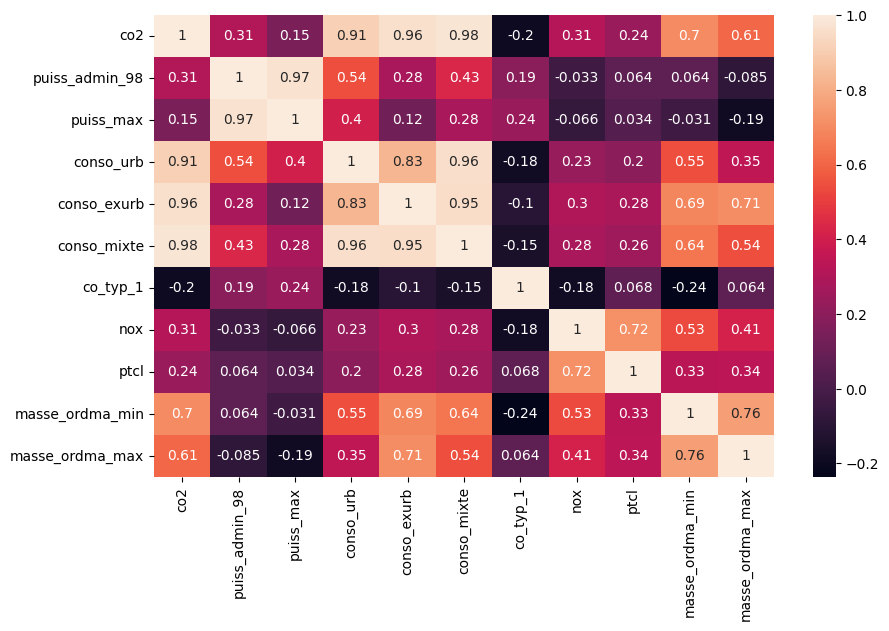

In [11]:
# Calcul des corrélations
cor = df_quantitative.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True)

### Visualisation des différentes données
<a id="Visualisation-des-differentes-donnees"></a>

Barplot de Libmarq (marque du véhicule)

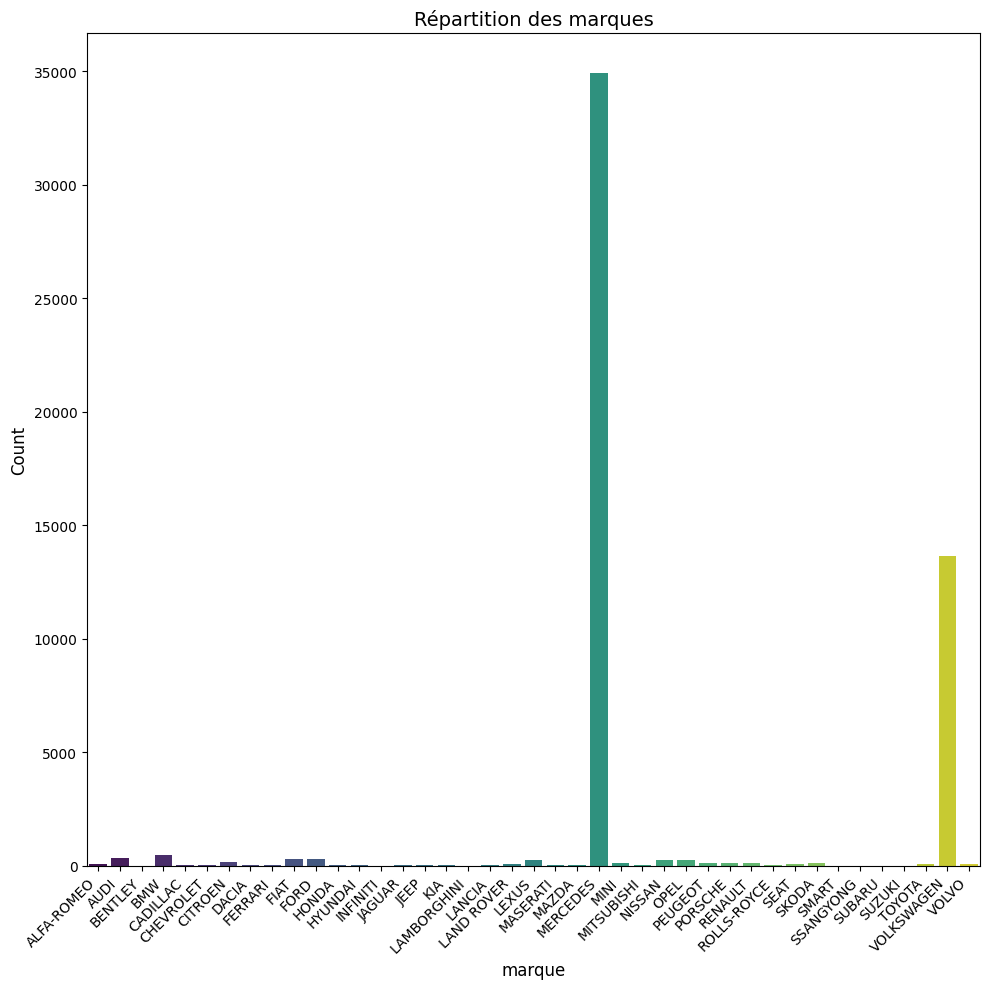

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_without_Na, x ='lib_mrq', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('marque', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Répartition des marques', fontsize=14) 
plt.tight_layout()
plt.show()

Différentes mode des variables lib_mod_doss, lib_mod et dscom

In [13]:
print("modalité de lib_mod_doss", df_without_Na['lib_mod_doss'].mode()[0])
print("modalité de lib_mod", df_without_Na['lib_mod_doss'].mode()[0])
print("modalité de dscom", df_without_Na['dscom'].mode()[0])

modalité de lib_mod_doss VIANO
modalité de lib_mod VIANO
modalité de dscom VIANO 2.2 CDI


Ces 3 variables semblent représentées une information similaire, nous allons voir si elles sont vraiment liées.  Nous allons faire un test du chi2 sur ces 3 variables 2 à 2 pour vérifier leur dépendance.

In [14]:
# On calcule la table de contingence entre lib_mod_doss et lib_mod
contingence_table1 = pd.crosstab(df['lib_mod_doss'], df['lib_mod'])

# On effectue le test du Chi2
stat1, p1, _, _ = chi2_contingency(contingence_table1)
print(f"P-value du Chi2 entre lib_mod_doss et lib_mod : {p1}")

# On effectue de même pour lib_mod et dscom
contingence_table2 = pd.crosstab(df['lib_mod'], df['dscom'])
stat2, p2, _, _ = chi2_contingency(contingence_table2)
print(f"P-value du Chi2 entre lib_mod et dscom : {p2}")


P-value du Chi2 entre lib_mod_doss et lib_mod : 0.0
P-value du Chi2 entre lib_mod et dscom : 0.0


Avec un p_value = 0, les variables sont clairement dépendantes les unes des autres. Nous allons voir à quel point elles sont liées avec le V de Cramer.

In [15]:
# Fonction qui calcul le V de Cramer
def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * k))

# Appliquer à tes variables
print("Cramer’s V entre lib_doss et lib_mod_doss :", cramers_v(contingence_table1))
print("Cramer’s V entre lib_mod et dscom:", cramers_v(contingence_table2))

Cramer’s V entre lib_doss et lib_mod_doss : 0.8871235030127076
Cramer’s V entre lib_mod et dscom: 0.9999034467115823


Les valeurs sont proches de 1, les 3 variables sont donc très fortements liées.

Boxplot des différents carburants en fonction de co2

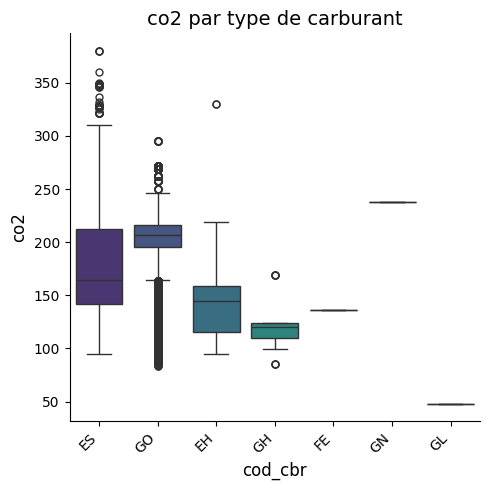

In [16]:
sns.catplot(data=df_without_Na, x='cod_cbr', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('cod_cbr', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 par type de carburant', fontsize=14) 
plt.tight_layout()
plt.show()

On regarde les différents carburants

In [17]:
carb_counts = df_without_Na['cod_cbr'].value_counts()
print(carb_counts)

cod_cbr
GO    49287
ES     2775
EH      208
GH       81
GN        8
FE        2
GL        1
Name: count, dtype: int64


On a :  
GO : gazoil  
ES : essence  
EH : essence/électricité (hybride non rechargeable)   
GH : gasoil/électricité (hybride non rechargeable)   
GN : gaz naturel  
Etant donné le peu de données sur les carburants GN, FE, GL et que ceux ci ne sont pas connus dans les abréviation courantes, on peut peut etre s'en séparer

On supprime donc les carburants peu présents et on renomme les autres

In [18]:
# on initialise une colonne vide 'carburant'
df_without_Na['carburant'] = None 

df_without_Na.loc[df_without_Na['cod_cbr'].str.startswith('GO'), 'carburant'] = 'Gazoil'

df_without_Na.loc[df_without_Na['cod_cbr'].str.startswith('ES'), 'carburant'] = 'Essence'

df_without_Na.loc[df_without_Na['cod_cbr'].str.startswith('GH'), 'carburant'] = 'Gasoil/Elec'

df_without_Na.loc[df_without_Na['cod_cbr'].str.startswith('EH'), 'carburant'] = 'Essence/Elec'

# On supprime les données qui contiennent des Na au niveau des carburants
df_without_Na = df_without_Na.dropna(subset=['carburant'])

# On supprime l'ancienne colonne cod_cbr
df_without_Na = df_without_Na.drop('cod_cbr', axis = 1)

# On affiche les modalités de la nouvelle variable 'carburant'
carb_filt_counts = df_without_Na['carburant'].value_counts()
print(carb_filt_counts)


carburant
Gazoil          49287
Essence          2775
Essence/Elec      208
Gasoil/Elec        81
Name: count, dtype: int64


On trace le boxplot des nouveaux carburants en fonction de co2

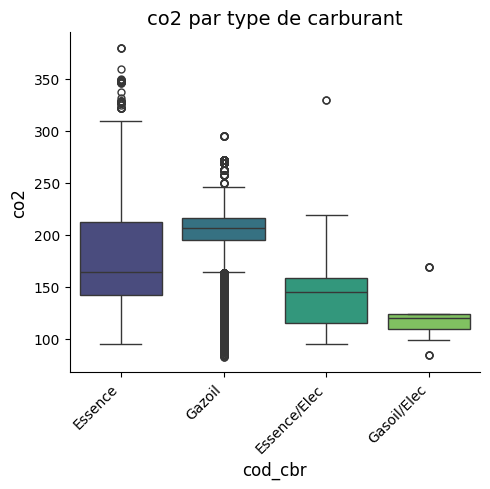

In [19]:
sns.catplot(data=df_without_Na, x='carburant', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('cod_cbr', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 par type de carburant', fontsize=14) 
plt.tight_layout()
plt.show()

Boxplot de la variable hybride en fonction de co2

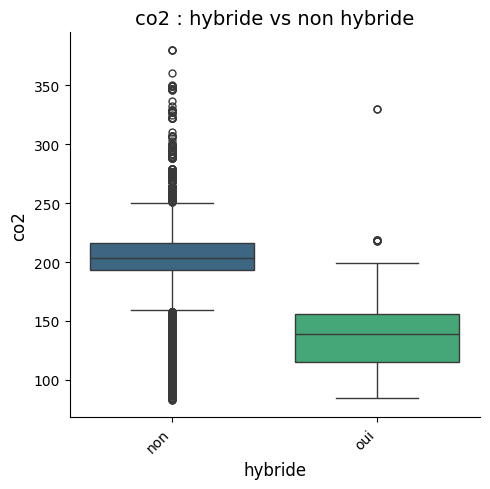

hybride
non    0.99448
oui    0.00552
Name: proportion, dtype: float64

In [20]:
sns.catplot(data=df_without_Na, x='hybride', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('hybride', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 : hybride vs non hybride', fontsize=14) 
plt.tight_layout()
plt.show()

# Proportion de voitures hybrides et non hybrides
df_without_Na["hybride"].value_counts(normalize=True)

    Nuage de points de Puissance_max en fonction de co2 et de la gamme de la voiture

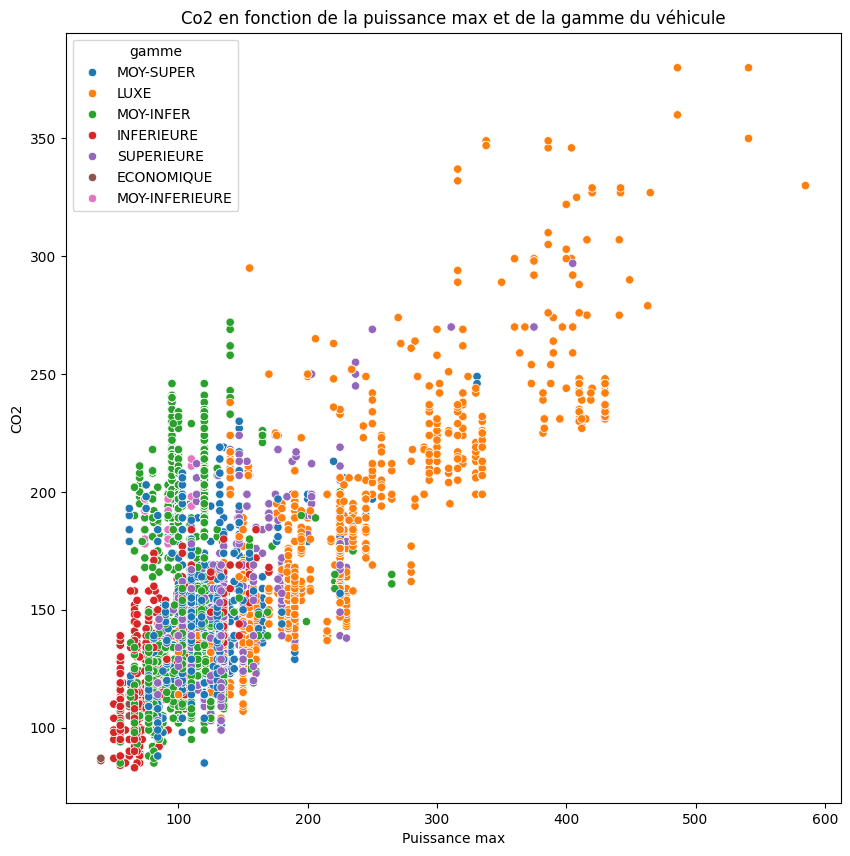

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="puiss_max", y="co2", data=df_without_Na, hue="gamme")
plt.xlabel("Puissance max")
plt.ylabel("CO2")
plt.title("Co2 en fonction de la puissance max et de la gamme du véhicule")
plt.show()

boxplot de typ_boite_nb_rapports en fonction de co2

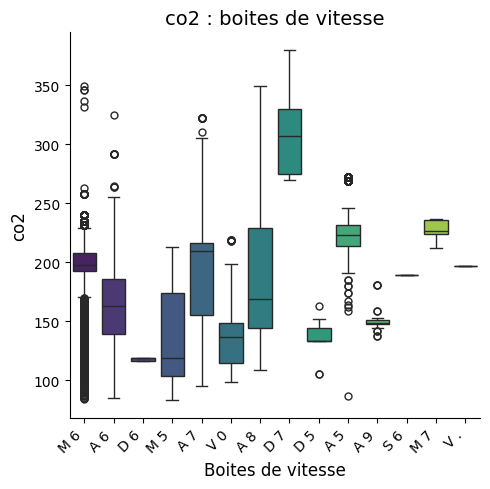

In [22]:

sns.catplot(data=df_without_Na, x='typ_boite_nb_rapp', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Boites de vitesse', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 : boites de vitesse', fontsize=14) 
plt.tight_layout()
plt.show()

Il faut rassembler les boites manuelles, automatiques et à variation continue et il faut rassembler les nombres de rapports allant de 5 à 9 et pouvant valoir 0 dans le cas d'une boite a variation continue.


In [23]:
# On regroupe les types de boite à vitesses

df_without_Na['typ_boite'] = None 


df_without_Na.loc[df_without_Na['typ_boite_nb_rapp'].str.startswith('M'), 'typ_boite'] = 'Manuelle'

df_without_Na.loc[df_without_Na['typ_boite_nb_rapp'].str.startswith('A'), 'typ_boite'] = 'Auto'

df_without_Na.loc[df_without_Na['typ_boite_nb_rapp'].str.startswith('V'), 'typ_boite'] = 'Var_continue'

# On supprime les Nan créées
df_without_Na = df_without_Na.dropna(subset=['typ_boite'])

print(df_without_Na['typ_boite'].value_counts())



typ_boite
Manuelle        31952
Auto            20163
Var_continue      194
Name: count, dtype: int64


In [24]:
# On regroupe les nombres de rapports

df_without_Na['nb_rapp'] = None 

list_vitesse = ['0','5', '6', '7', '8', '9']

for i in list_vitesse:
    df_without_Na.loc[df_without_Na['typ_boite_nb_rapp'].str.contains(i), 'nb_rapp'] = i

# On supprimer les Nan créées
df_without_Na = df_without_Na.dropna(subset=['nb_rapp'])

rapport_counts = df_without_Na['nb_rapp'].value_counts()
print(rapport_counts)

nb_rapp
6    32089
5    12857
7     6631
8      503
0      193
9       35
Name: count, dtype: int64


On supprime l'ancienne colonne 

In [25]:
df_without_Na = df_without_Na.drop('typ_boite_nb_rapp', axis = 1)

On trace les boxplot de co2 en fonction du nombre de rapports et des boites de vitesse ainsi que les barplot de chacune de ces variables pour voir leur répartition.

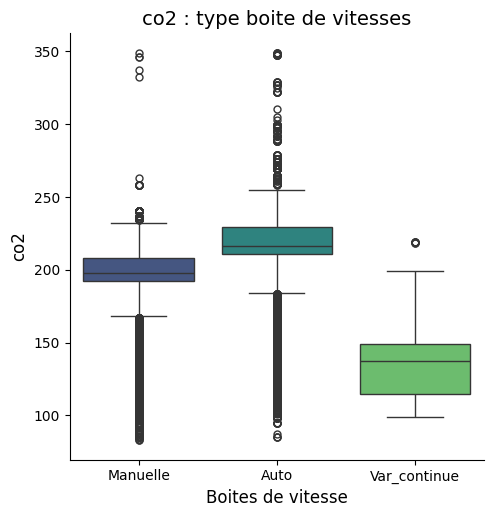

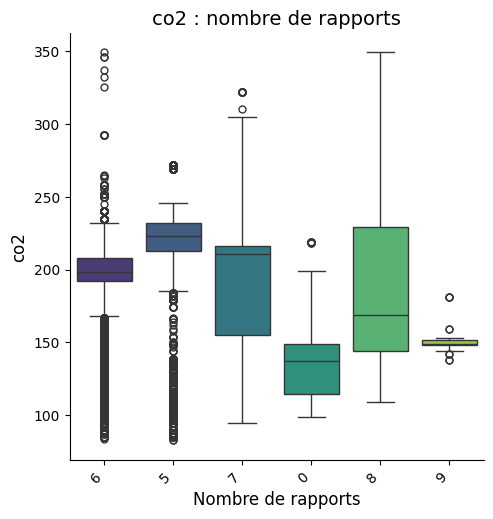

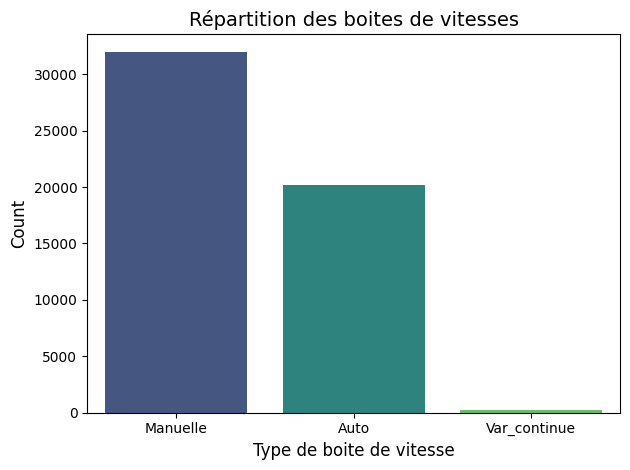

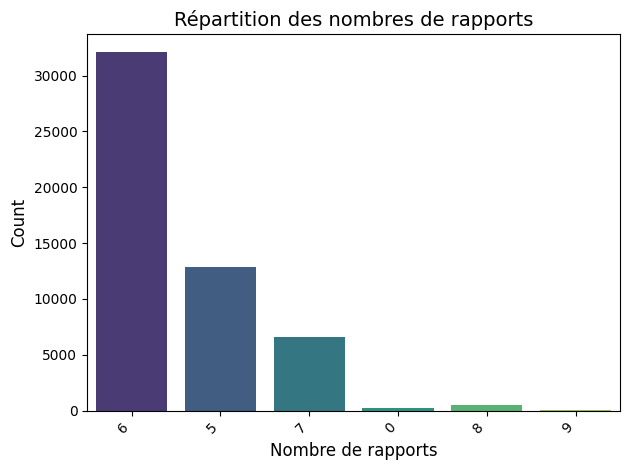

In [26]:
# Boxplot du type de boite

sns.catplot(data=df_without_Na, x='typ_boite', y='co2', kind='box', palette="viridis")
plt.xlabel('Boites de vitesse', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 : type boite de vitesses', fontsize=14) 

# Boxplot du nombre de rapports
sns.catplot(data=df_without_Na, x='nb_rapp', y='co2', kind='box', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Nombre de rapports', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 : nombre de rapports', fontsize=14) 
plt.show()

# Barplot du type de boite
sns.countplot(data=df_without_Na, x ='typ_boite', palette="viridis")
plt.xlabel('Type de boite de vitesse', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Répartition des boites de vitesses', fontsize=14) 
plt.tight_layout()
plt.show()

# Barplot du nombre de rapports
sns.countplot(data=df_without_Na, x ='nb_rapp', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Nombre de rapports', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Répartition des nombres de rapports', fontsize=14) 
plt.tight_layout()
plt.show()


Variable CO2  
Nous allons transformer cette variables numériques en variable catégorielle (7 catégories différentes)

In [27]:
# Transformation de la variable co2 en variable catégorielle

bins = [0, 100, 120, 140, 160, 200, 250, float('inf')]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

df_without_Na['category'] = pd.cut(df_without_Na['co2'], bins=bins, labels=labels, right=True)


Graphe de la réparition des différentes catégories

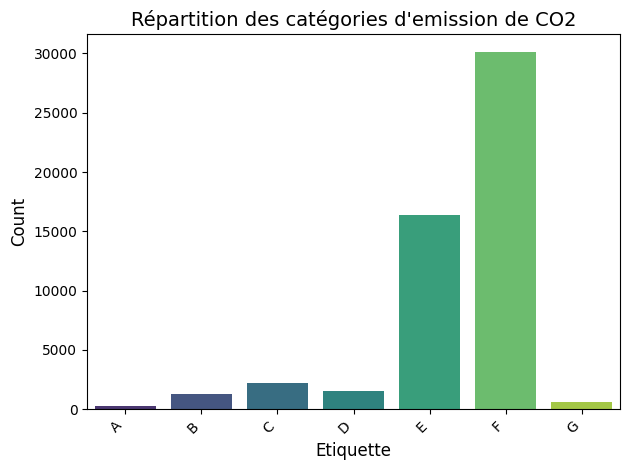

In [28]:
sns.countplot(data=df_without_Na, x ='category', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Etiquette', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Répartition des catégories d'emission de CO2", fontsize=14) 
plt.tight_layout()
plt.show()

Variables Nox et ptcl

Les moteur diesel émettent beaucoup de Nox que les autres moteurs, nous allons calculer la moyenne de NOx en fonction du type de carburant.


In [29]:
print('Nox en fonction du carburant', df_without_Na.groupby('carburant')['nox'].mean())

Nox en fonction du carburant carburant
Essence         0.027083
Essence/Elec    0.007228
Gasoil/Elec     0.101506
Gazoil          0.330136
Name: nox, dtype: float64


Afin de voir si l'on garde la variables ptcl qui contient beaucoup de Nan, on regarde comment sont répartis les Na de la variables ptcl suivant la marque de la voiture

In [30]:
na_counts = df.groupby('lib_mrq')['ptcl'].apply(lambda x: x.isna().sum()).reset_index()
na_counts = na_counts.sort_values(by='ptcl', ascending=False)
print(na_counts)


         lib_mrq  ptcl
26      MERCEDES  1303
10          FIAT   228
31          OPEL   154
0     ALFA-ROMEO   108
22         LEXUS   107
1   ASTON MARTIN    78
43        TOYOTA    57
7        CITROEN    54
38         SMART    48
6      CHEVROLET    41
44    VOLKSWAGEN    38
32       PEUGEOT    36
19   LAMBORGHINI    35
30        NISSAN    33
20        LANCIA    33
12         HONDA    32
16          JEEP    25
34       RENAULT    24
23         LOTUS    21
28          MINI    21
41        SUZUKI    19
17           KIA    15
37         SKODA    14
3        BENTLEY    14
11          FORD    13
27           MIA    13
8          DACIA    12
40        SUBARU    11
45         VOLVO    11
13       HYUNDAI    10
29    MITSUBISHI    10
25         MAZDA     9
14      INFINITI     9
36          SEAT     8
24      MASERATI     7
18          LADA     6
5       CADILLAC     6
4            BMW     6
9        FERRARI     4
2           AUDI     3
42         TESLA     2
21    LAND ROVER     0
15        J

On peut se permettre de garder la variable ptcl en supprimant les valeurs manquantes étant donné
qu'elles sont principalement sur les voiture de marque Mercedes et que cette marque est la plus représentée
dans notre jeu de données.

Le gaz Nox est responsable de l'apparition de particules fines, 
nous allons regarder le lien entre nos deux variables.

In [31]:
contingence_table = pd.crosstab(df['nox'], df['ptcl'])
stat, p, _, _ = chi2_contingency(contingence_table)
print(f"P-value du Chi2 entre lib_mod et dscom : {p}")
print("Cramer’s V entre lib_mod et dscom:", cramers_v(contingence_table))

P-value du Chi2 entre lib_mod et dscom : 0.0
Cramer’s V entre lib_mod et dscom: 0.7704859066042469


Nos variables sont dépendantes l'une de l'autre (p_value = 0) et forcement liées (V = 0.8)

Barplot de la variable carosserie

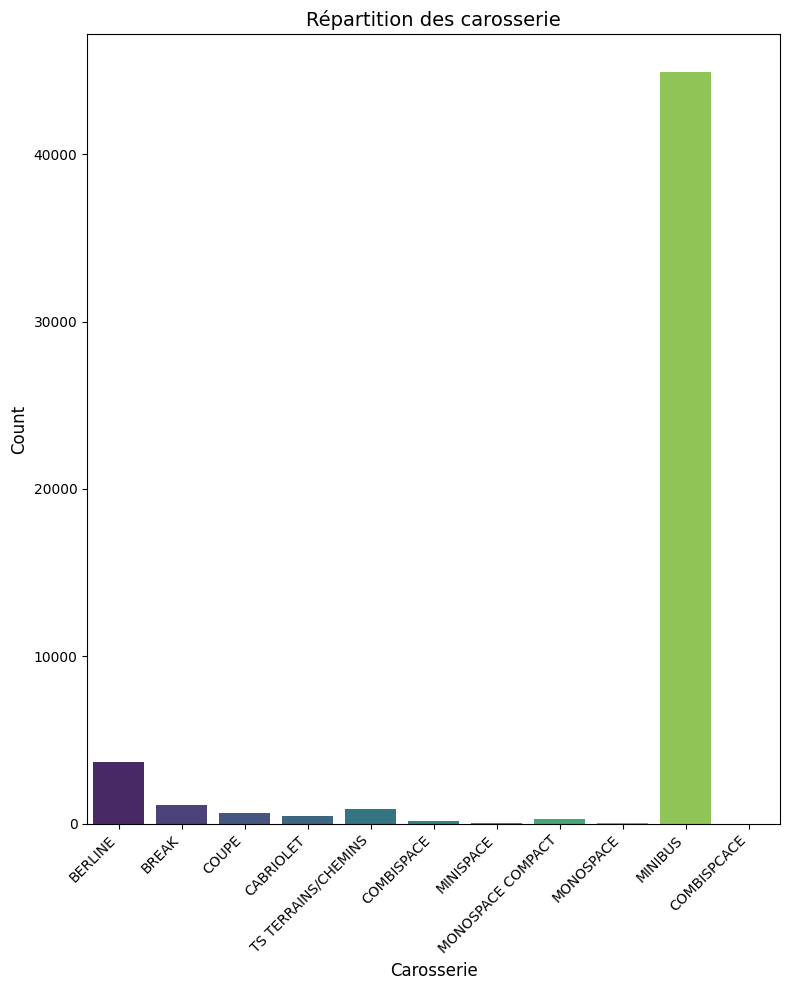

Carrosserie
MINIBUS                44925
BERLINE                 3656
BREAK                   1123
TS TERRAINS/CHEMINS      895
COUPE                    657
CABRIOLET                446
MONOSPACE COMPACT        299
COMBISPACE               183
MINISPACE                 63
MONOSPACE                 58
COMBISPCACE                3
Name: count, dtype: int64


In [32]:
plt.figure(figsize=(8, 10))
sns.countplot(data=df_without_Na, x ='Carrosserie', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Carosserie', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Répartition des carosserie', fontsize=14) 
plt.tight_layout()
plt.show()

# On regarde le nombre de modalités pour chaque type de carrosseries
carross_count = df_without_Na['Carrosserie'].value_counts()
print(carross_count)

Répartition des différentes gammes de voitures

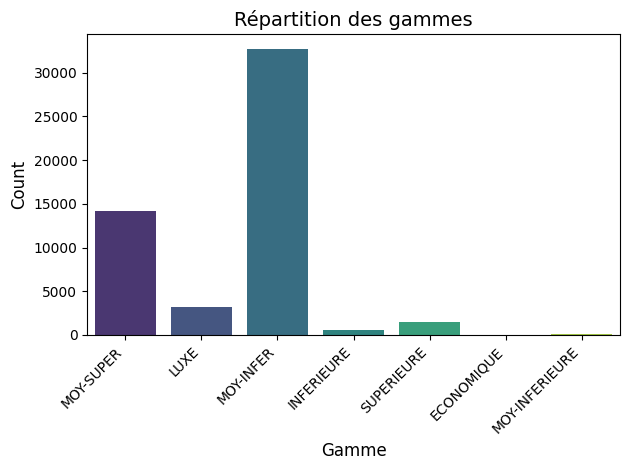

In [33]:
sns.countplot(data=df_without_Na, x ='gamme', palette="viridis")
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Gamme', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Répartition des gammes', fontsize=14) 
plt.tight_layout()
plt.show()

On voit qu'il y a 2 classes "moyenne inférieure"

In [34]:
# On regarde le nombre de modalités pour chaque type de gamme
gamme_count = df_without_Na['gamme'].value_counts()
print(gamme_count)

# On rassemble les variables MOY-INFIEURE et MOY-INFER sous le nom de MOY-INFER
df_without_Na['gamme'] = df_without_Na['gamme'].replace('MOY-INFERIEURE', 'MOY-INFER')

gamme
MOY-INFER         32743
MOY-SUPER         14228
LUXE               3208
SUPERIEURE         1436
INFERIEURE          602
MOY-INFERIEURE       56
ECONOMIQUE           35
Name: count, dtype: int64


Boxplot des gammes de voitures en fonction du co2

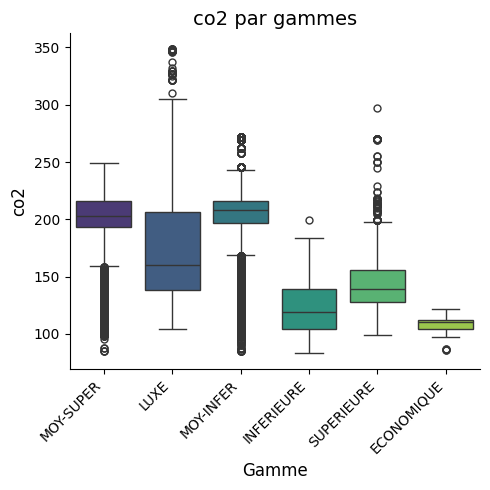

In [35]:
sns.catplot(data=df_without_Na, x='gamme', y='co2', kind='box', palette="viridis" )
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.xlabel('Gamme', fontsize=12)
plt.ylabel('co2', fontsize=12)
plt.title('co2 par gammes', fontsize=14) 
plt.tight_layout()
plt.show()

## 5.Enregistrement des données nettoyées
<a id="5.Enregistrement"></a>

In [36]:

df_without_Na.to_csv('Donnees_propes.csv', index=False)